In [1]:
%matplotlib inline

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

In [9]:
import pandas as pd

# Read in the data with `read_csv()`
indata = pd.read_csv('compiled_data_full.csv')

indata.head()

,game_date,pitch_type,release_speed,zone,release_spin_rate,release_extension,height,weight,Player Name,Year,Injury,Elbow,TJ,Shoulder,TJ/Shoulder,Both,age
0,8/23/15,FC,86.1,14,2167,6.044,74,200,Kendall Graveman,2015,Oblique,0,0,0,0,0,25
1,8/23/15,SI,90.4,9,2022,6.146,74,200,Kendall Graveman,2015,Oblique,0,0,0,0,0,25
2,8/23/15,FF,90.6,14,2264,6.574,74,200,Kendall Graveman,2015,Oblique,0,0,0,0,0,25
3,8/23/15,SI,89.9,14,2047,6.371,74,200,Kendall Graveman,2015,Oblique,0,0,0,0,0,25
4,8/23/15,FC,87.5,14,2108,6.485,74,200,Kendall Graveman,2015,Oblique,0,0,0,0,0,25


In [33]:
import seaborn as sns

# cols = [col for col in indata.columns if col not in ['Injury Category','Team','Year','Injury Num','Most Pitched','Injury','Injury Shortened','Injury Shortened.1','Tommy John','Type','Player Name','TJ Num',]]
# data = indata[cols]
# #assigning the Oppurtunity Result column as target
# target = indata['TJ Num']
# data.head(n=2)

#cols = [col for col in indata.columns if col not in ['pitch_type','Player Name','Year','Injury','game_date','Unnamed','Elbow','TJ','Shoulder']]
cols = [col for col in indata.columns if col in ['zone','release_speed','release_extension','release_spin_rate','height','weight','age']]
data = indata[cols]
#assigning the Oppurtunity Result column as target
target = indata['Both']
data.head(n=2)

data.corr()

# data['pitch_type'].unique()

,release_speed,zone,release_spin_rate,release_extension,height,weight,age
release_speed,1.000000,-0.128312,0.041632,0.324312,0.008197,0.025832,-0.166390
zone,-0.128312,1.000000,-0.031046,-0.034712,-0.015821,-0.008189,0.006499
release_spin_rate,0.041632,-0.031046,1.000000,-0.122084,-0.007292,-0.081680,0.018762
release_extension,0.324312,-0.034712,-0.122084,1.000000,0.280342,0.160573,-0.091169
height,0.008197,-0.015821,-0.007292,0.280342,1.000000,0.467314,0.058819
weight,0.025832,-0.008189,-0.081680,0.160573,0.467314,1.000000,0.263865
age,-0.166390,0.006499,0.018762,-0.091169,0.058819,0.263865,1.000000


In [34]:
#import the necessary module
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [35]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(target_test, pred), recall_score(target_test, pred)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(target_test, pred)))

Naive-Bayes accuracy :  0.6390642763445562
Precision: 0.4863,   Recall: 0.1298
ROC AUC score: 0.5266 


In [36]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0,max_iter=1000)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(target_test, pred), recall_score(target_test, pred)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(target_test, pred)))

LinearSVC accuracy :  0.6416790555312637
Precision: 0.0000,   Recall: 0.0000
ROC AUC score: 0.5000 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=5)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(target_test, pred), recall_score(target_test, pred)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(target_test, pred)))

KNeighbors accuracy score :  0.7853825972890249
Precision: 0.7232,   Recall: 0.6497
ROC AUC score: 0.7554 


In [38]:
randomforest = RandomForestClassifier()
rand = randomforest.fit(data_train, target_train)

pred = rand.predict(data_test)

print(rand.score(data_test,target_test))

y_predict = rand.predict(data_test)
print(f1_score(target_test, y_predict))

print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(target_test, pred), recall_score(target_test, pred)))
print("ROC AUC score: {:6.4f} ".format(roc_auc_score(target_test, pred)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9804940970703979
0.9725140325691154
KNeighbors accuracy score :  0.9804940970703979
Precision: 0.9822,   Recall: 0.9630
ROC AUC score: 0.9766 


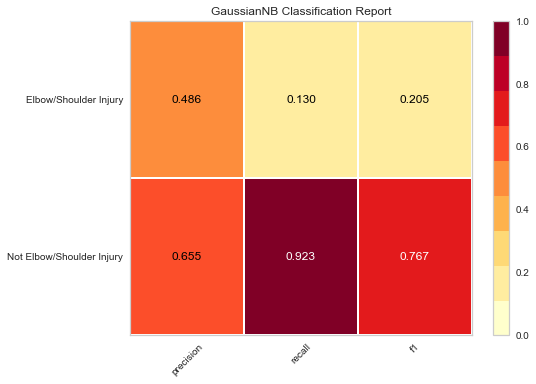

In [39]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Not Elbow/Shoulder Injury','Elbow/Shoulder Injury'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


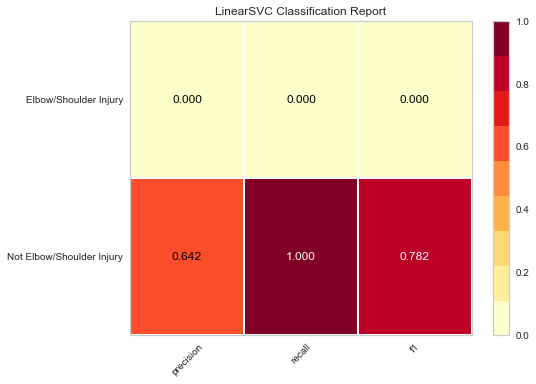

In [40]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Not Elbow/Shoulder Injury','Elbow/Shoulder Injury'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

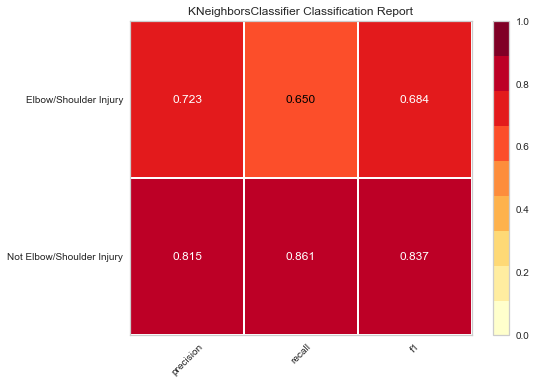

In [42]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Not Elbow/Shoulder Injury','Elbow/Shoulder Injury'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

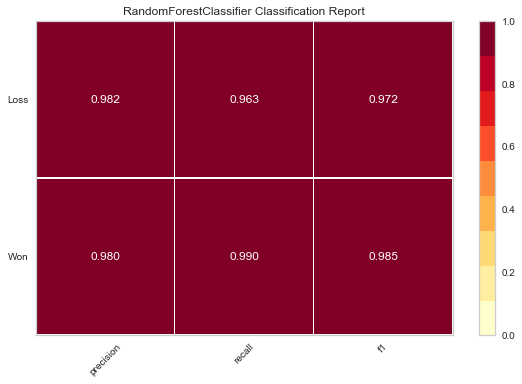

In [20]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rand, classes=['Not Elbow/Shoulder Injury','Elbow/Shoulder Injury'])
visualizer.fit(data_train, target_train) # Fit the training data to the visualizer
visualizer.score(data_test, target_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data